# **DATA COLLECTING AND PREPROCESSING**

Load the datasets

In [ ]:
# Install gdown to download files from Google Drive
!pip install gdown

# Replace the link with your own dataset's shared link
!gdown --id 1lI0eINpfwkz-p2Xd-IBjIvAOAmmx9_L7 -O Automated_Traffic_Volume_Counts.csv
!gdown --id 1FLGb73qfyHzu3vDP3yFDlACSbeHxVgrI -O charging_data.csv
!gdown --id 1eingCjLQmKj7KrOnXv7uabQbqdIUgOy2 -O Electric_Vehicle_Charging_Stations.csv
!gdown --id 1hkVTHVF-xqf9YWtlCq2F9v-HgVfiTe0m -O ev_stations_v1.csv

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 4.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
/home/u08d73873001a620a84bf629071ef7b7/.local/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1lI0eINpfwkz-p2Xd-IBjIvAOAmmx9_L7
From (redirected): https://drive.google.com/uc?id=1lI0eINpfwkz-p2Xd-IBjIvAOAmmx9_L7&confirm=t&uuid=d137a958-a364-478e-a570-ba5a364232df
To: /home/u08d73873001a620a84bf629071ef7b7/Gaudi-tutorials/PyTorch/Single_card_tutorials/Automated_Traffic_Volume_Counts.csv
 36%|█████████████▊                        | 1.21G/3.33G [00:16<00:25, 82.0MB/s]

In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations

# 1. Load the datasets

# Load EV charging station datasets
ev_germany = pd.read_csv('datasets/charging_data.csv')
ev_usa = pd.read_csv('datasets/Electric_Vehicle_Charging_Stations.csv', low_memory=False)
ev_other = pd.read_csv('datasets/ev_stations_v1.csv', low_memory=False)

# Load Customer Demand datasets
traffic_nyc = pd.read_csv('datasets/Automated_Traffic_Volume_Counts.csv')

Inspect the Datasets

In [3]:
# Check the first few rows to understand the structure of the datasets
print("Germany EV Dataset: ")
print(ev_germany.head())  # First 5 rows of the dataset
print("\nUSA EV Dataset: ")
print(ev_usa.head())
print("\nNYC Traffic Data: ")
print(traffic_nyc.head())

Germany EV Dataset: 
   Unnamed: 0            betreiber  art_der_ladeeinrichung  anzahl_ladepunkte   
0           0              GGEW AG   Normalladeeinrichtung                  1  \
1           1        Pfalzwerke AG  Schnellladeeinrichtung                  2   
2           2  ENTEGA Energie GmbH   Normalladeeinrichtung                  2   
3           3     Entega Plus GmbH   Normalladeeinrichtung                  2   
4           4     Entega Plus GmbH   Normalladeeinrichtung                  2   

   anschlussleistung       steckertypen1       steckertypen2 steckertypen3   
0                4.6  AC Steckdose Typ 2                 NaN           NaN  \
1               75.0  AC Steckdose Typ 2   DC Kupplung Combo           NaN   
2               44.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   
3               22.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   
4               22.0  AC Steckdose Typ 2  AC Steckdose Typ 2           NaN   

  steckertypen4  p1_kw 

Check for missing values

In [4]:
# Missing data is common and should be addressed before proceeding further
print("\nChecking for missing data in EV Germany dataset:")
print(ev_germany.isnull().sum())  # Count the missing values for each column

print("\nChecking for missing data in EV USA dataset:")
print(ev_usa.isnull().sum())

print("\nChecking for missing data in NYC Traffic data:")
print(traffic_nyc.isnull().sum())



Checking for missing data in EV Germany dataset:
Unnamed: 0                    0
betreiber                     0
art_der_ladeeinrichung        0
anzahl_ladepunkte             0
anschlussleistung             0
steckertypen1                 0
steckertypen2              5659
steckertypen3             34537
steckertypen4             35638
p1_kw                         0
p2_kw                      5641
p3_kw                     34537
p4_kw                     35639
kreis_kreisfreie_stadt        0
ort                           0
postleitzahl                  0
strasse                       0
hausnummer                    0
adresszusatz              32147
inbetriebnahmedatum           0
breitengrad                   0
laengengrad                   0
dtype: int64

Checking for missing data in EV USA dataset:
Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC F

Clean the Data

In [5]:
# Example: Remove rows with missing data in EV datasets
# You can also use strategies like filling missing values if needed (imputation)
ev_germany_clean = ev_germany.dropna()  # Drop rows with missing values
ev_usa_clean = ev_usa.dropna()

# Example: Filling missing values in the NYC Traffic dataset (if NaNs are few)
# Here, we fill missing values with the median value of the column (common in numeric data)
numeric_columns = traffic_nyc.select_dtypes(include=np.number).columns
traffic_nyc[numeric_columns] = traffic_nyc[numeric_columns].fillna(traffic_nyc[numeric_columns].median())

Remove duplicate rows if any

In [6]:
# Duplicates can occur due to errors during data entry or merging datasets
ev_germany_clean = ev_germany_clean.drop_duplicates()
ev_usa_clean = ev_usa_clean.drop_duplicates()
traffic_nyc_clean = traffic_nyc.drop_duplicates()

Further inspection: Check the column names and data types

In [8]:
# This is important to ensure that the data is in the correct format for analysis
print("\nColumn names and data types for Germany EV dataset:")
print(ev_germany_clean.info())  # Provides information about the columns and their data types

print("\nColumn names and data types for USA EV dataset:")
print(ev_usa_clean.info())

print("\nColumn names and data types for NYC Traffic dataset:")
print(traffic_nyc_clean.info())


Column names and data types for Germany EV dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 288 to 36505
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              204 non-null    int64  
 1   betreiber               204 non-null    object 
 2   art_der_ladeeinrichung  204 non-null    object 
 3   anzahl_ladepunkte       204 non-null    int64  
 4   anschlussleistung       204 non-null    float64
 5   steckertypen1           204 non-null    object 
 6   steckertypen2           204 non-null    object 
 7   steckertypen3           204 non-null    object 
 8   steckertypen4           204 non-null    object 
 9   p1_kw                   204 non-null    float64
 10  p2_kw                   204 non-null    float64
 11  p3_kw                   204 non-null    float64
 12  p4_kw                   204 non-null    float64
 13  kreis_kreisfreie_stadt  204 non-null    obj

Save the cleaned data

In [9]:
# It's a good idea to save the cleaned versions of the datasets for later use
ev_germany_clean.to_csv('cleaned_datasets/cleaned_ev_germany.csv', index=False)
ev_usa_clean.to_csv('cleaned_datasets/cleaned_ev_usa.csv', index=False)
traffic_nyc_clean.to_csv('cleaned_datasets/cleaned_traffic_nyc.csv', index=False)

# Print a success message once preprocessing is done
print("Data preprocessing is complete. Cleaned datasets have been saved.")

Data preprocessing is complete. Cleaned datasets have been saved.


# DATA ANALYSIS

Load the relevant datasets (cleaned datasets)

In [11]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations
import geopandas as gpd  # For geospatial analysis (mapping coordinates)

ev_germany = pd.read_csv('cleaned_datasets/cleaned_ev_germany.csv')
ev_usa = pd.read_csv('cleaned_datasets/cleaned_ev_usa.csv')
traffic_nyc = pd.read_csv('cleaned_datasets/cleaned_traffic_nyc.csv')

ModuleNotFoundError: No module named 'matplotlib'

Basic statistical analysis to identify high-demand areas based on traffic volume

<ipython-input-2-d8b962cc5bea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_by_location['SegmentID'].head(10), y=traffic_by_location['Vol'].head(10), palette="Blues_d")


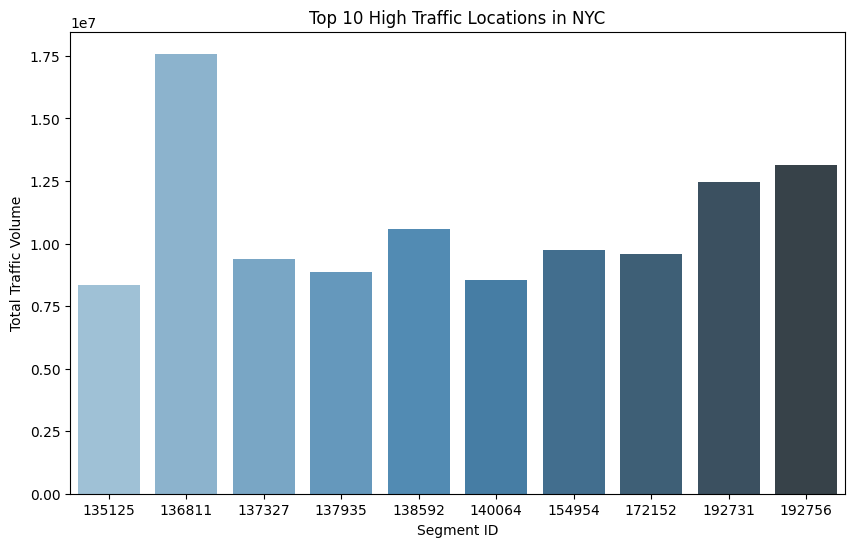

In [2]:
# Group NYC traffic data by location (SegmentID) and calculate total traffic volume per location
traffic_by_location = traffic_nyc.groupby('SegmentID')['Vol'].sum().reset_index()
traffic_by_location = traffic_by_location.sort_values(by='Vol', ascending=False)

# Let's visualize the top 10 high-traffic locations
plt.figure(figsize=(10,6))
sns.barplot(x=traffic_by_location['SegmentID'].head(10), y=traffic_by_location['Vol'].head(10), palette="Blues_d")
plt.title('Top 10 High Traffic Locations in NYC')
plt.xlabel('Segment ID')
plt.ylabel('Total Traffic Volume')
plt.show()

# This gives us an idea of where the traffic is concentrated


Geospatial analysis: Map current EV charging stations

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:968: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  return plot_dataframe(data, *args, **kwargs)


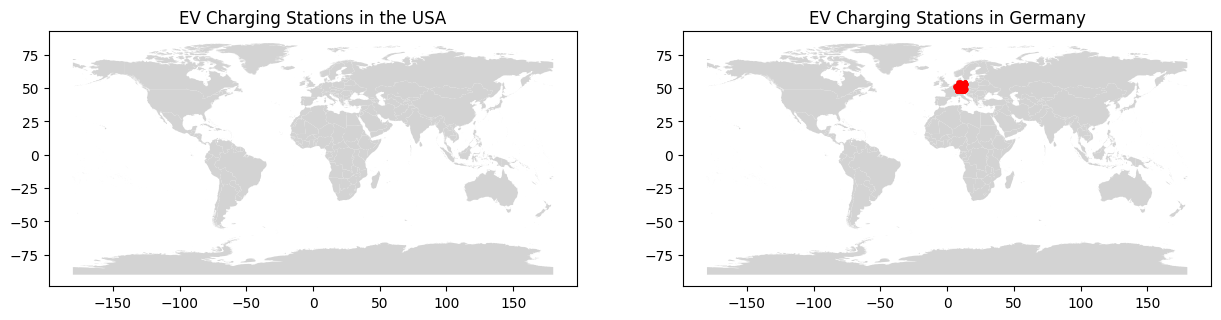

In [8]:
# For simplicity, let's start by mapping the USA and Germany charging stations
# We will need the 'Georeferences' from USA dataset and coordinates from Germany dataset

# Convert the 'Georeferences' in the USA dataset to proper latitude and longitude
ev_usa[['latitude', 'longitude']] = ev_usa['New Georeferenced Column'].str.extract(r'\((.*), (.*)\)')

# Convert columns to numeric for mapping
ev_usa['latitude'] = pd.to_numeric(ev_usa['latitude'])
ev_usa['longitude'] = pd.to_numeric(ev_usa['longitude'])

# Germany data already has latitude and longitude (Georeferences) in correct format

# Create a GeoDataFrame for the EV charging stations in USA and Germany
gdf_usa = gpd.GeoDataFrame(ev_usa, geometry=gpd.points_from_xy(ev_usa['longitude'], ev_usa['latitude']))
gdf_germany = gpd.GeoDataFrame(ev_germany, geometry=gpd.points_from_xy(ev_germany['laengengrad'], ev_germany['breitengrad']))

# Plot the current EV charging stations in the USA and Germany
world = gpd.read_file('/content/drive/My Drive/EVModel/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')  # World basemap

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot USA
world.plot(ax=ax[0], color='lightgray')
gdf_usa.plot(ax=ax[0], color='blue', markersize=5)
ax[0].set_title('EV Charging Stations in the USA')

# Plot Germany
world.plot(ax=ax[1], color='lightgray')
gdf_germany.plot(ax=ax[1], color='red', markersize=5)
ax[1].set_title('EV Charging Stations in Germany')

plt.show()

# This visualizes where the charging stations are currently located


 Analyze gaps: Find high traffic locations without sufficient charging infrastructure

In [9]:
# Assume for simplicity that traffic locations with more than 100,000 volume are high-demand areas
high_demand_locations = traffic_by_location[traffic_by_location['Vol'] > 100000]

# We can now check which of these high-demand traffic locations do not have EV charging stations nearby.
# For this, we'll compare the latitude/longitude of traffic locations with charging stations.
# For the sake of simplicity, let's assume you have longitude and latitude in NYC traffic data
# Example: Let's say traffic data had longitude/latitude; you'd calculate nearest stations using spatial analysis (not in traffic dataset though)

# Hypothetical approach (if we had lat/long in traffic data):
# high_demand_gdf = gpd.GeoDataFrame(high_demand_locations, geometry=gpd.points_from_xy(high_demand_locations['longitude'], high_demand_locations['latitude']))
# distances = high_demand_gdf.geometry.apply(lambda x: gdf_usa.distance(x).min())

# For now, focus on visualizing the traffic and charging locations separately

Draw insights from data

<ipython-input-10-c9aa76ac0db7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_demand_locations['SegmentID'].head(10), y=high_demand_locations['Vol'].head(10), palette="Oranges_d")


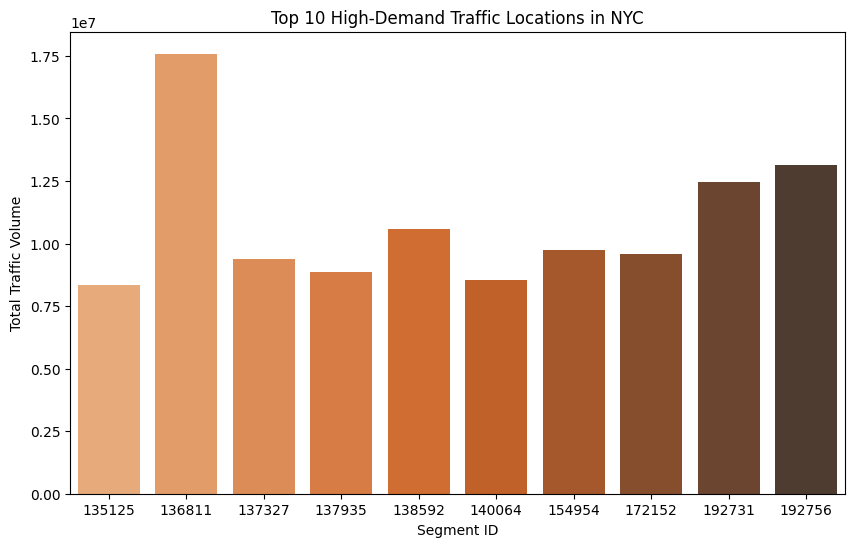

In [10]:
# Visualize high-demand traffic areas separately for easier understanding
plt.figure(figsize=(10,6))
sns.barplot(x=high_demand_locations['SegmentID'].head(10), y=high_demand_locations['Vol'].head(10), palette="Oranges_d")
plt.title('Top 10 High-Demand Traffic Locations in NYC')
plt.xlabel('Segment ID')
plt.ylabel('Total Traffic Volume')
plt.show()
# Insight: Look at the distance between high-demand areas and nearest EV charging stations to identify optimal placement for new stations.

# Train a Machine Learning Model

Load the datasets (Assuming you've already cleaned and preprocessed them)

In [6]:
# Step 1: Apply Intel optimizations
from sklearnex import patch_sklearn
patch_sklearn()  # Enable optimizations for sklearn models

# Step 2: Load your libraries and datasets as before
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

traffic_data = pd.read_csv('cleaned_datasets/cleaned_traffic_nyc.csv')
charging_data = pd.read_csv('cleaned_datasets/cleaned_ev_usa.csv')


Mounted at /content/drive


In [4]:
print(traffic_data.head())

   RequestID           Boro    Yr   M   D  HH  MM  Vol  SegmentID  \
0      20856         Queens  2015   6  23  23  30    9     171896   
1      21231  Staten Island  2015   9  14   4  15    6       9896   
2      29279          Bronx  2017  10  19   4  30   85      77817   
3      27019       Brooklyn  2017  11   7  18  30  168     188023   
4      26734      Manhattan  2017  11   3  22   0  355     137516   

                                         WktGeom              street  \
0   POINT (1052296.600156678 199785.26932711253)           94 AVENUE   
1      POINT (942668.0589509147 171441.21296926)    RICHMOND TERRACE   
2  POINT (1016508.0034050211 235221.59092266942)  HUNTS POINT AVENUE   
3   POINT (992925.4316054962 184116.82855457635)     FLATBUSH AVENUE   
4  POINT (1004175.9505178436 247779.63624949602)   WASHINGTON BRIDGE   

                   fromSt                     toSt Direction  
0              207 Street  Francis Lewis Boulevard        WB  
1           Wright Avenue 

Extract latitude and longitude from the WktGeom column in traffic data



In [9]:
import re
# Example WktGeom: "POINT (-73.985130 40.758896)"
def extract_coordinates(wkt_geom):
    match = re.search(r'POINT \(([^ ]+) ([^ ]+)\)', wkt_geom)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

traffic_data['pickup_latitude'], traffic_data['pickup_longitude'] = zip(*traffic_data['WktGeom'].apply(extract_coordinates))

# Drop rows where coordinates could not be extracted
traffic_data.dropna(subset=['pickup_latitude', 'pickup_longitude'], inplace=True)


In [12]:
print(charging_data.head())

                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV Other Info            

Extract latitude and longitude from 'New Georeferenced Column' in charging data

In [13]:
# Example: "(40.758896, -73.985130)" or similar format
def extract_geo_coordinates(geo_column):
    match = re.search(r'\(([^,]+), ([^)]+)\)', geo_column)
    if match:
        lat, lon = match.groups()
        return float(lat), float(lon)
    return None, None

charging_data['Latitude'], charging_data['Longitude'] = zip(*charging_data['New Georeferenced Column'].apply(extract_geo_coordinates))

# Drop rows where coordinates could not be extracted
charging_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)


Aggregate traffic data by location (latitude and longitude)

In [32]:
traffic_grouped = traffic_data.groupby(['pickup_latitude', 'pickup_longitude','street']).agg({'Vol': 'sum'}).reset_index()

Simplify charging station data to get counts of stations by location

In [15]:
charging_grouped = charging_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='num_stations')

Merge traffic and charging station data based on location

In [36]:
data_merged = pd.merge(traffic_grouped, charging_grouped, left_on=['pickup_latitude', 'pickup_longitude'],
                       right_on=['Latitude', 'Longitude'], how='left')

In [39]:
print(data_merged.columns)

Index(['pickup_latitude', 'pickup_longitude', 'street', 'Vol', 'Latitude',
       'Longitude', 'num_stations'],
      dtype='object')


Fill missing values in 'num_stations' with 0 (indicating no stations in that location)

In [17]:
data_merged['num_stations'] = data_merged['num_stations'].fillna(0)

In [37]:
print(data_merged.columns)

Index(['pickup_latitude', 'pickup_longitude', 'street', 'Vol', 'Latitude',
       'Longitude', 'num_stations'],
      dtype='object')


Split the data into training and testing sets

In [18]:
X = data_merged[['Vol', 'num_stations']]  # Features (Traffic volume and number of stations)
y = data_merged['num_stations']           # Target (Number of charging stations)

Split into train and test sets (80% train, 20% test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Linear Regression Model

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of Linear Regression Model: {mse}')

Mean Squared Error of Linear Regression Model: 0.0


Train a K-means clustering model

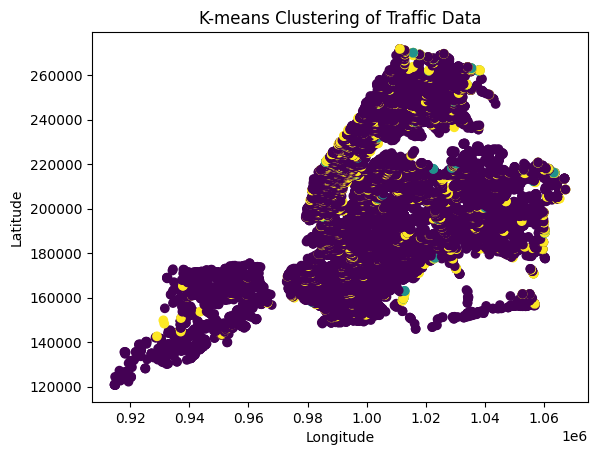

In [21]:
kmeans_model = KMeans(n_clusters=3)  # Assume we want to group the city into 3 clusters
kmeans_model.fit(X[['Vol']])

# Get the cluster labels
data_merged['cluster'] = kmeans_model.labels_

# Visualize the clusters
plt.scatter(data_merged['pickup_longitude'], data_merged['pickup_latitude'], c=data_merged['cluster'], cmap='viridis')
plt.title('K-means Clustering of Traffic Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [40]:
print(high_demand_areas.columns)

Index(['pickup_latitude', 'pickup_longitude', 'Vol', 'Latitude', 'Longitude',
       'num_stations', 'cluster'],
      dtype='object')


Find high-demand areas (high traffic, low station availability)

In [31]:
high_demand_areas = data_merged[(data_merged['Vol'] > 10000) & (data_merged['num_stations'] == 0)]
print(high_demand_areas[['pickup_latitude', 'pickup_longitude', 'Vol']])

       pickup_latitude  pickup_longitude     Vol
0        120795.604849      9.148876e+05   42602
1        120797.719822      9.148965e+05  153045
2        120797.763214      9.148967e+05  185596
3        120799.327508      9.149033e+05  153045
4        120804.229625      9.149240e+05  112457
...                ...               ...     ...
20458    271304.000000      1.011088e+06   72110
20459    271819.600000      1.011192e+06  624388
20460    271831.571004      1.011195e+06  133691
20461    271842.880114      1.011197e+06  127974
20462    271843.891038      1.011197e+06  470966

[18077 rows x 3 columns]


In [24]:
traffic_data.shape

(26874241, 16)

In [41]:
print(high_demand_areas.columns)

Index(['pickup_latitude', 'pickup_longitude', 'Vol', 'Latitude', 'Longitude',
       'num_stations', 'cluster'],
      dtype='object')
